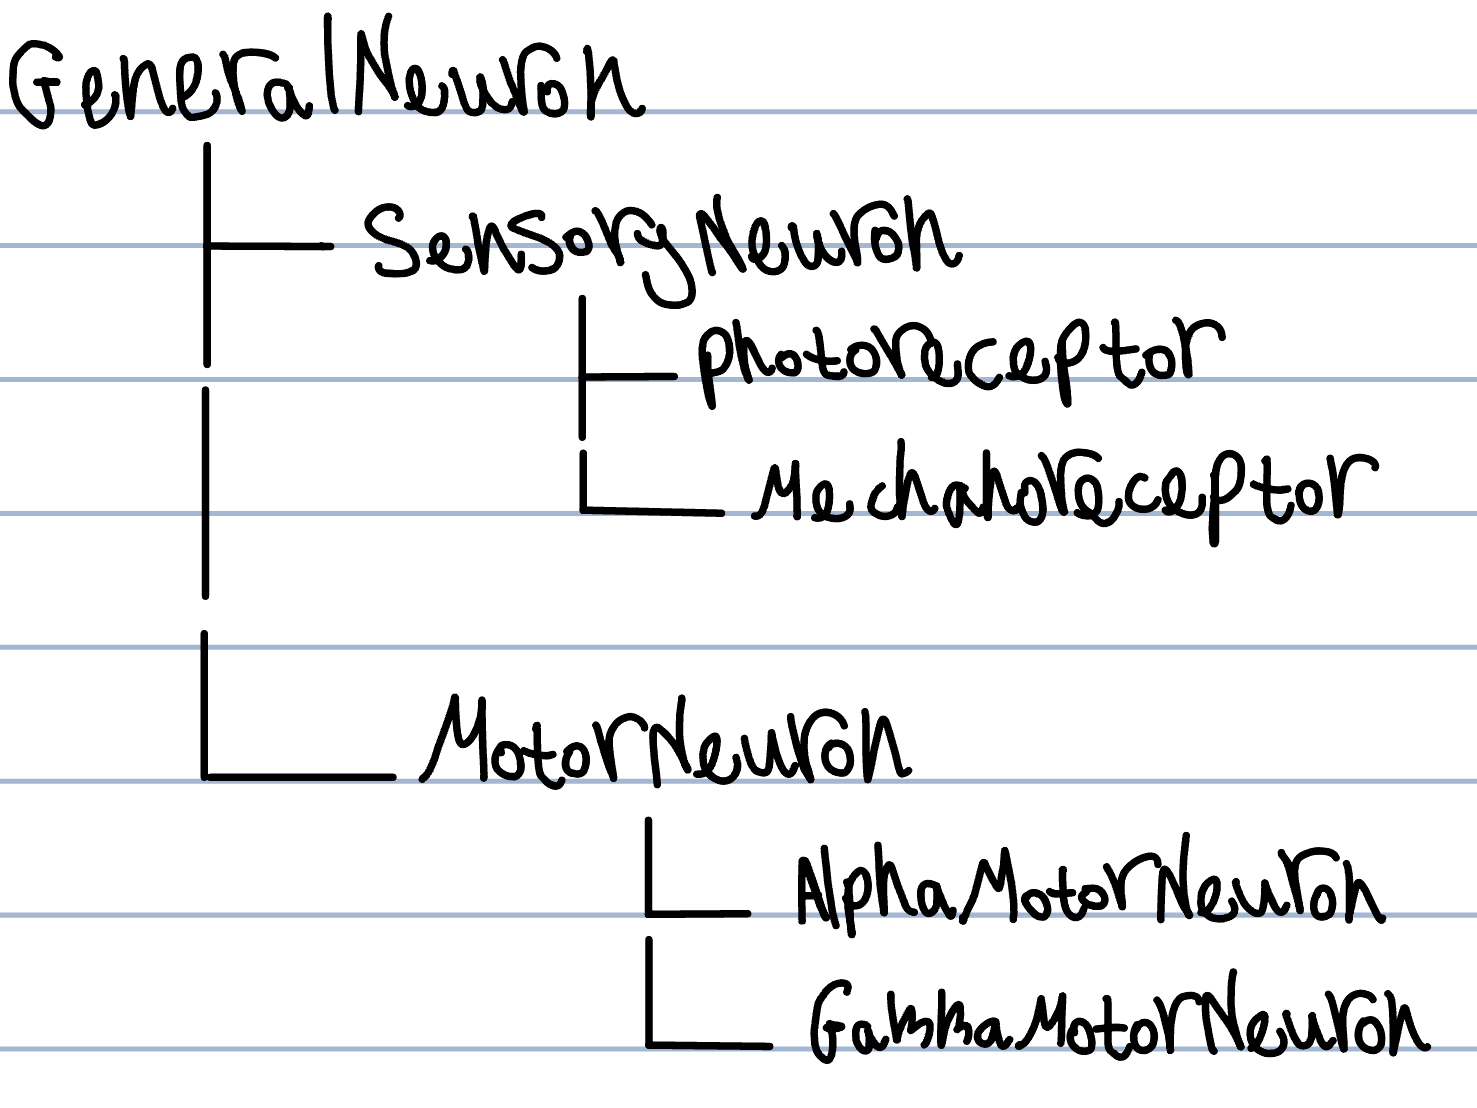

In [3]:
from IPython.display import Image, display
display(Image(filename="./picture_for_mini_project.jpeg"))


In [4]:
class GeneralNeuron:
    def __init__(self, firing_rate=0):
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):
        pass

class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0,receptor_type=""):
         super().__init__(firing_rate)
         self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus):
        pass

class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate=0, target_muscle=""):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self):
        pass

class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, receptor_type="light")

    def detect_light(self, light_intensity):
        pass

class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(self, firing_rate, receptor_type="pressure")

    def decect_pressure(self, pressure_level):
        pass

class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, riting_rate=0):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def control_skeletal_muscle(self):
        pass

class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def control_muscle_spindle(self):
        pass    

In [7]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

  Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.3-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.9 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.

The length of the original array: 100
The length of the sampled array: 28


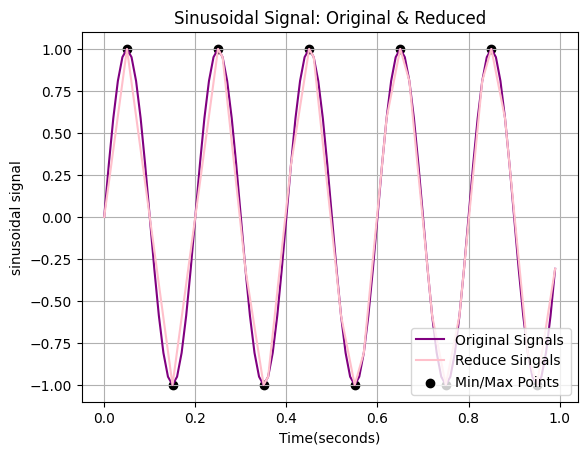

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def calculateExtrime(arr: np.array):
    '''Defines a function that receives an array (arr) and calculates the extreme points (maximum and minimum) in the array'''
    slope = np.diff(arr)
    '''The difference between adjacent values ​​in the array (ie, the "slope" between adjacent points) is calculated.'''
    maxima = np.where((slope[:-1] > 0) & (slope[1:] < 0))[0] + 1
    '''Identifies maximum points by changing the direction of the slope: when the slope increases and then decreases'''
    minima = np.where((slope[:-1] < 0) & (slope[1:] > 0))[0] + 1
    '''Identifies minimum points by changing the direction of the slope: when the slope decreases and then increases.'''
    return maxima, minima

def sinusoidalSignal(arr: np.array):
    steps = 5 
    size = max(len(arr) // steps, 1)
    '''Divide the signal into 5 segments to sample 20% of the points.'''
    maxima, minima = calculateExtrime(arr)
    sampledPoint = np.linspace(0, len(arr) - 1, size, dtype=int)
    '''A list of indices for uniform sampling from the array.'''
    all_indices = np.unique(np.concatenate((sampledPoint, maxima, minima)))
    '''Combine the indices of the sample points with the maximum and minimum points.'''
    return arr[all_indices], all_indices

'''I will now create a time array from 0 to 1 in jumps of 0.01 seconds, with a signal frequency of 5, and a sine signal according to the previous settings of time and jumps.'''
time = np.arange(0, 1, 0.01)
frequency = 5
arr = np.sin(2 * np.pi * frequency * time)

maxima, minima = calculateExtrime(arr)
sampleArr, sampleIndices = sinusoidalSignal(arr)
newTime = time[sampleIndices]

print("The length of the original array:", len(arr))
print("The length of the sampled array:", len(sampleArr))

'''Draw the original in purple and the reduced in pink.
Mark maximum and minimum points (in black).
Add a title, labels to the graphs and a legend.'''

plt.plot(time, arr, label="Original Signals", color='purple')
plt.plot(newTime, sampleArr, label="Reduce Singals ", color='pink')
plt.scatter(time[maxima], arr[maxima], label="Min/Max Points", color='black')
plt.scatter(time[minima], arr[minima], color='black')
plt.title('Sinusoidal Signal: Original & Reduced')
plt.xlabel('Time(seconds)')
plt.ylabel('sinusoidal signal')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

